In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import matplotlib.colors as mcolors
import datetime
import matplotlib.dates as mdates

In [2]:
data_path = "./data/"
interpolated_sonde = "anxinterpolatedsondeM1.c1.20200313.000030.custom.nc"
fluxes = "anx30ecorM1.b1.20200313.000000.nc"
flux_csv = 'anx30ecorM1.b1.20200314.000000.custom.csv'

In [3]:
data = xr.open_dataset(data_path+interpolated_sonde, engine='netcdf4')
data_flux = xr.open_dataset(data_path+fluxes, engine='netcdf4')
data_flux_csv = pd.read_csv(data_path+flux_csv, parse_dates=['time_offset'])

In [4]:
# selecting up to 5 km in height
data = data.sel(height=slice(0, 5))
data

<xarray.Dataset>
Dimensions:            (time: 1440, height: 205)
Coordinates:
  * time               (time) datetime64[ns] 2020-03-13T00:00:30 ... 2020-03-...
  * height             (height) float32 0.002 0.022 0.042 ... 4.852 4.902 4.952
Data variables: (12/39)
    base_time          datetime64[ns] ...
    time_offset        (time) datetime64[ns] ...
    precip             (time) float32 ...
    qc_precip          (time) int32 ...
    temp               (time, height) float32 ...
    qc_temp            (time, height) int32 ...
    ...                 ...
    qc_rh_scaled       (time, height) int32 ...
    aqc_rh_scaled      (time, height) int32 ...
    vapor_source       (time, height) int32 ...
    lat                float32 ...
    lon                float32 ...
    alt                float32 ...
Attributes: (12/13)
    command_line:          idl -D 0 -R -n interpolatedsonde -s anx -f M1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     anxgriddedsondeM1.c0 : 3.0 : 20200311.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    facility_id:           M1
    data_level:            c1
    location_description:  Cold-Air Outbreaks in the Marine Boundary Layer Ex...
    datastream:            anxinterpolatedsondeM1.c1
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-04-0...

In [5]:
# Extract variables from the dataset
time = np.array(data['time'])
height = data['height']
specific_humidity = data['sh']  * 1000  # Convert from g/g to g/kg
potential_temperature = data['potential_temp']
relative_humidity = data['rh']
sensible_heat_flux = data_flux_csv['h'] #sensible heat flux
latent_heat_flux = data_flux_csv['lv_e'] # latent heat flux
time_for_lat_sens_heat = data_flux_csv['time_offset']

# Vertical Profile of Potential temperature, Specific Humidity and Relative Humidity Over Time

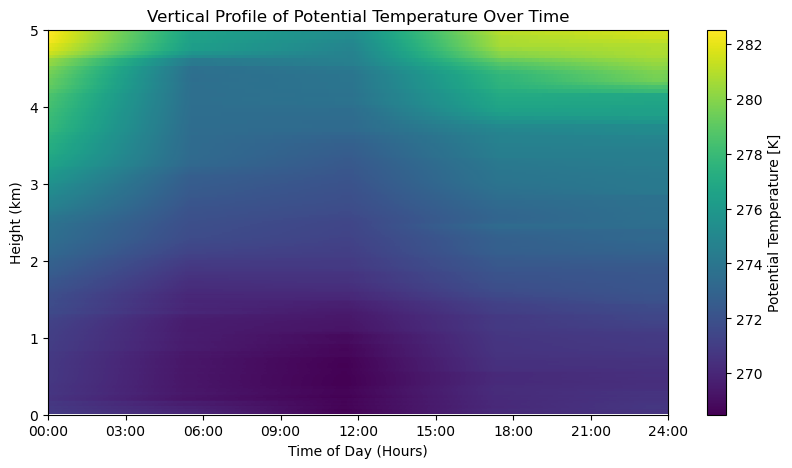

In [6]:
# Convert time to pandas datetime
time_pd = pd.to_datetime(time)
# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]
# Extract numpy arrays for plotting
height_np = height.values
potential_temperature_np = potential_temperature.values.T  # Transposed for correct orientation
# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))
# Using pcolormesh to create the plot
pcm = ax.pcolormesh(fractional_hours, height_np, potential_temperature_np)
# # Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Potential Temperature [K]')
# # Setting the y-axis limit
ax.set_ylim(0, 5)
# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels
# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Potential Temperature Over Time");
fig.savefig("./figures/potential-temperature.png", dpi=500, bbox_inches="tight")

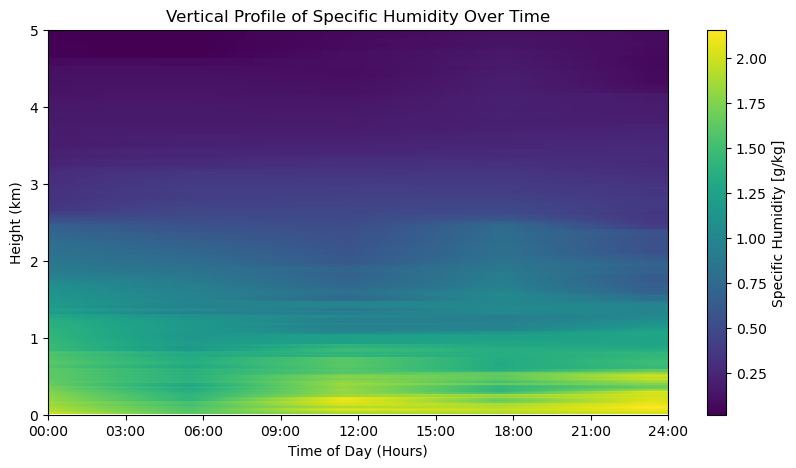

In [7]:
# Extracting specific humidity, time, and height
specific_humidity = specific_humidity
# Convert time to pandas datetime
time_pd = pd.to_datetime(time)
# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]
# Extract numpy arrays for plotting
height_np = height.values
specific_humidity_np = specific_humidity.values.T  # Transposed for correct orientation
# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))
# Using pcolormesh to create the pseudocolor plot
pcm = ax.pcolormesh(fractional_hours, height_np, specific_humidity_np, shading='auto')
# Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Specific Humidity [g/kg]')
# Setting the y-axis limit
ax.set_ylim(0, 5)
# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels
# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Specific Humidity Over Time")
fig.savefig("./figures/specific-humidity.png", dpi=500, bbox_inches="tight")

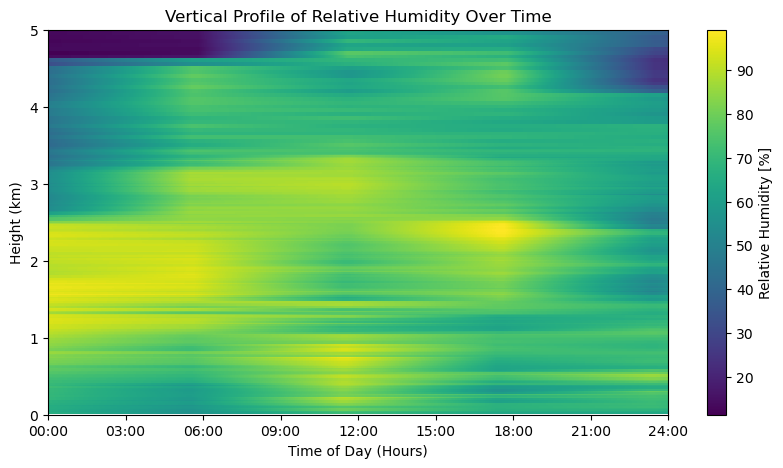

In [8]:
# Convert time to pandas datetime
time_pd = pd.to_datetime(time)
# Convert time to fractional hours
fractional_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in time_pd.time]
# Extract numpy arrays for plotting
height_np = height.values
relative_humidity_np = relative_humidity.values.T  # Transposed for correct orientation
# Creating the plot
fig, ax = plt.subplots(figsize=(10, 5))
# Using pcolormesh to create the pseudocolor plot
pcm = ax.pcolormesh(fractional_hours, height_np, relative_humidity_np, shading='auto')
# Adding a colorbar
cbar = plt.colorbar(pcm, ax=ax, label='Relative Humidity [%]')
# Setting the y-axis limit
ax.set_ylim(0, 5)
# Formatting the x-axis to show every 3 hours
ax.set_xticks(np.arange(0, 25, 3))  # Every 3 hours
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 3)])  # Hour labels
# Adding labels and a title
ax.set_xlabel("Time of Day (Hours)")
ax.set_ylabel("Height (km)")
ax.set_title("Vertical Profile of Relative Humidity Over Time")
fig.savefig("./figures/relative-humidity.png", dpi=500, bbox_inches="tight")

# Mean Potential Temperature, Relative humidity and Specific Humidity Profile over time

In [9]:
# Lists to store the mean values for each variable
mean_specific_humidity = []
mean_relative_humidity = []
mean_potential_temperature = []


# Looping through each unique time and calculating the mean for each variable
for time_point in time:
    mean_sh = specific_humidity.sel(time=time_point).mean().item()
    mean_pt = potential_temperature.sel(time=time_point).mean().item()
    mean_rh = relative_humidity.sel(time=time_point).mean().item()
   
    mean_specific_humidity.append(mean_sh)
    mean_relative_humidity.append(mean_rh)
    mean_potential_temperature.append(mean_pt)

# # # Example: Displaying the first few mean values for each variable
print("First few mean specific humidity values:", mean_specific_humidity[:5])
print("First few mean relative humidity values:", mean_relative_humidity[:5])
print("First few mean potential temperature values:", mean_potential_temperature[:5])

First few mean specific humidity values: [0.869234025478363, 0.8688885569572449, 0.8685429692268372, 0.8681972622871399, 0.8678515553474426]
First few mean relative humidity values: [70.49596405029297, 70.51728057861328, 70.53858184814453, 70.55989837646484, 70.58120727539062]
First few mean potential temperature values: [273.8226013183594, 273.81494140625, 273.8072814941406, 273.7996520996094, 273.7919616699219]


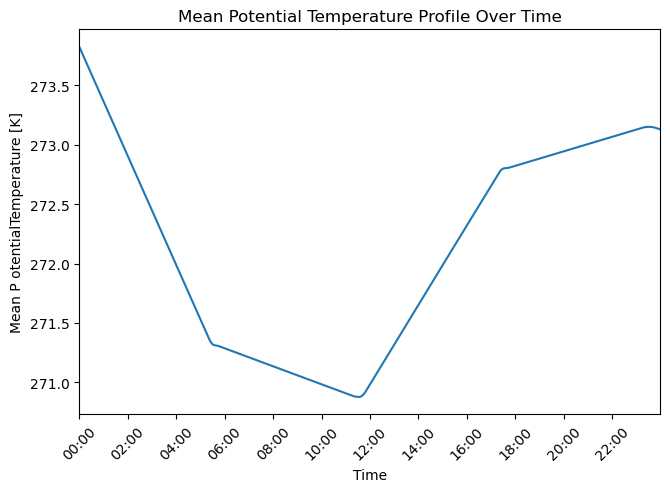

In [10]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_potential_temperature)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean P otentialTemperature [K]')
ax.set_title('Mean Potential Temperature Profile Over Time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-potential-temp.png", dpi=500, bbox_inches="tight")

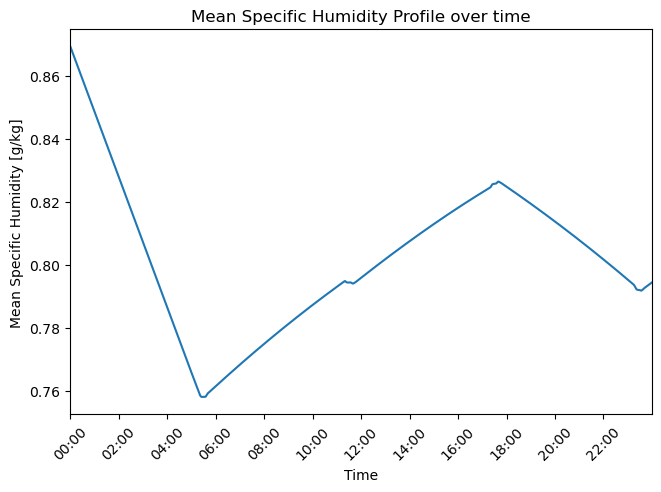

In [11]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_specific_humidity)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean Specific Humidity [g/kg]')
ax.set_title('Mean Specific Humidity Profile over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-specific-humidity.png", dpi=500, bbox_inches="tight")

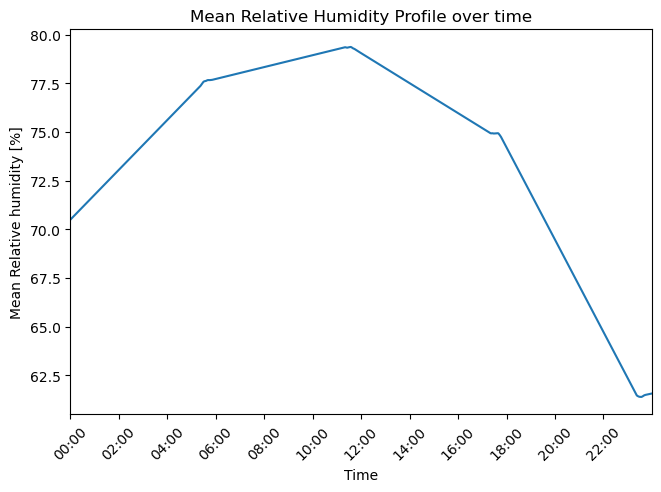

In [12]:
# Creating the plot using fig, ax
fig, ax = plt.subplots(figsize=(7.5, 5))

# Plotting the data
ax.plot(time, mean_relative_humidity)

# Formatting the plot
ax.set_xlabel('Time')
ax.set_ylabel('Mean Relative humidity [%]')
ax.set_title('Mean Relative Humidity Profile over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits from 00:00 to 23:59 on March 13th
start_time = datetime.datetime(2020, 3, 13, 0, 0)
end_time = datetime.datetime(2020, 3, 13, 23, 59)
ax.set_xlim(start_time, end_time)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/mean-relative-humidity.png", dpi=500, bbox_inches="tight")

# Plot for sensible and latent heat flux (use K m s^-1 instead of W m^-2)

In [13]:
air_density = 1.225  
air_shc = 1005

def convert_shf_list(shf_list):
  """Convert a list of SHF values from W/m^2 to K*m/s"""
  # Empty list to store converted values  
  shf_kms_list = [] 
  # Iterate through list 
  for shf in shf_list:
    # Calculate and append conversion  
    shf_kms = shf / (air_density * air_shc)
    shf_kms_list.append(shf_kms)
  return shf_kms_list

In [14]:
# Latent heat of vaporization of water
L = 2.5e6 # J/kg  

def convert_lhf(lhf):
  """Convert latent heat flux from W/m2 to g/kg*m/s"""
  
  # Calculate mass flux 
  q_kgs = lhf / L # kg/m2*s 
  
  # Convert mass flux to g/kg*m/s
  q_gkgms = q_kgs * 1000 # g/kg*m/s  

  return q_gkgms

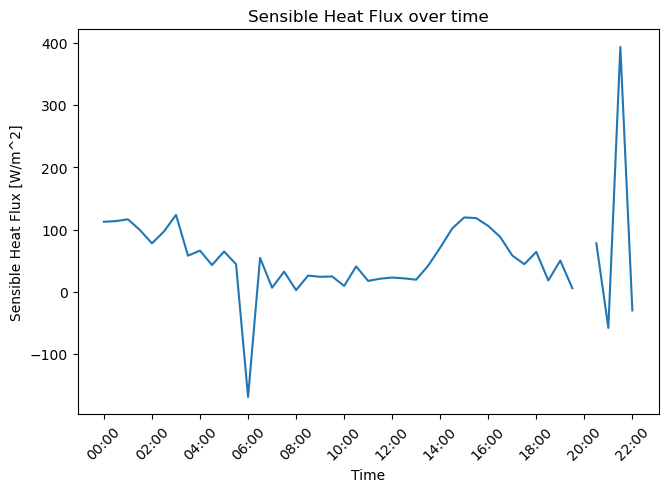

In [15]:
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(time_for_lat_sens_heat, sensible_heat_flux)
ax.set_xlabel("Time")
ax.set_ylabel("Sensible Heat Flux [W/m^2]")
ax.set_title('Sensible Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/sensible-heat-flux.png", dpi=500, bbox_inches="tight")

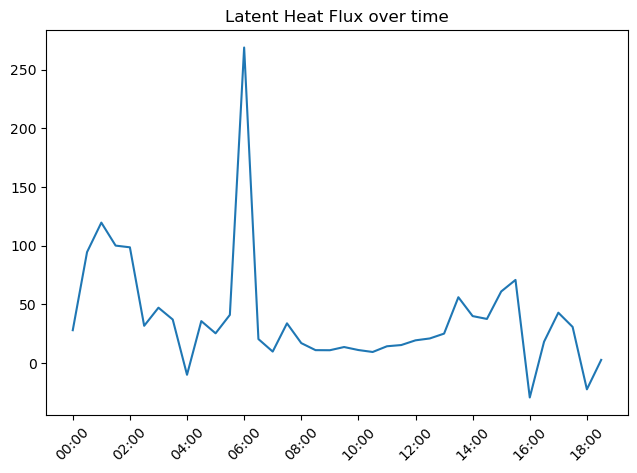

In [16]:
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(time_for_lat_sens_heat, latent_heat_flux)
ax.set_title('Latent Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/latent-heat-flux.png", dpi=500, bbox_inches="tight")

In [17]:
# Convert list  
converted_list_SHF = convert_shf_list(sensible_heat_flux)
print(f"Converted SHF List (K*m/s): {converted_list_SHF}")

Converted SHF List (K*m/s): [0.09137983551629607, 0.0922733272413443, 0.09454766981419434, 0.08049548177479947, 0.063226723525231, 0.07870037567265713, 0.10031475276677836, 0.04711138186617931, 0.053706975327444416, 0.03486242258097269, 0.05257792669306529, 0.035942735303076456, -0.13727281957559143, 0.04420347243374962, 0.005309777642400244, 0.026341760584830946, 0.0021240735100010156, 0.021167631231597116, 0.019502487562189055, 0.020071073205401566, 0.007591430602091583, 0.033116052391105696, 0.014206518428266828, 0.017049446644329374, 0.01859275053304904, 0.017463701898669914, 0.015749822316986496, 0.03409889328865875, 0.057581480353335365, 0.08260737130673165, 0.09706569194842116, 0.096090973702914, 0.08593765864554777, 0.07146309269976647, 0.04737130673164788, 0.03596710325921414, 0.051984973093715095, 0.014766981419433445, 0.040751345314245103, 0.004653467357092091, nan, 0.06333231800182759, -0.04714387247436288, 0.31954513148542996, -0.024351710833587167, nan, nan, nan]


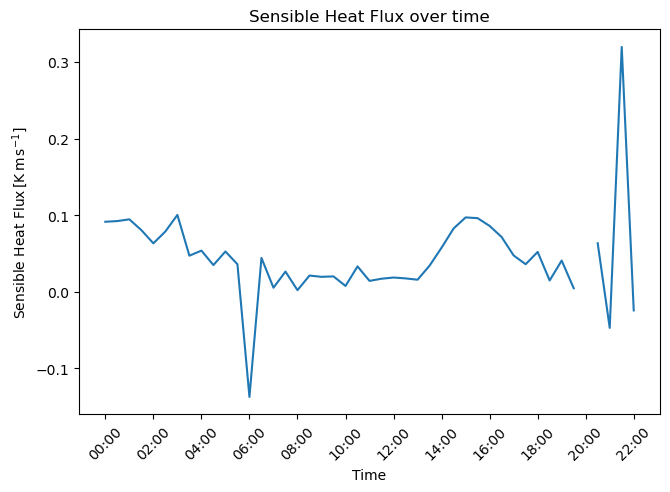

In [18]:
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(time_for_lat_sens_heat, converted_list_SHF)
ax.set_xlabel("Time")
ax.set_ylabel(r'$\text{Sensible Heat Flux} \, [\text{K} \, \text{m} \, \text{s}^{-1}]$')
ax.set_title('Sensible Heat Flux over time')



# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
fig.savefig("./figures/sensible-heat-flux-convert.png", dpi=500, bbox_inches="tight")

In [19]:
converted_list_latent = convert_lhf(latent_heat_flux)
# print(f"Converted SHF List (K*m/s): {converted_list_latent}")

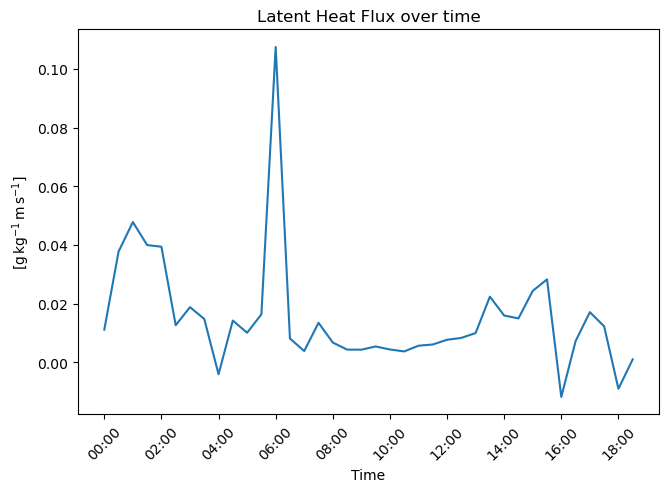

In [20]:
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(time_for_lat_sens_heat, converted_list_latent)
ax.set_xlabel("Time")
ax.set_ylabel(r'$[\text{g} \, \text{kg}^{-1} \, \text{m} \, \text{s}^{-1}]$')
ax.set_title('Latent Heat Flux over time')

# Set x-ticks at regular intervals (e.g., every 3 hours)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# # Rotate the x-tick labels for better readability
plt.xticks(rotation=45);
# fig.savefig("./figures/latent-heat-flux-convert.png", dpi=500, bbox_inches="tight")

In [21]:
# mean values for sensible heat flux
np.nanmean(sensible_heat_flux), np.nanmean(converted_list_SHF)

(55.45879545454545, 0.045047249836162415)

In [22]:
# mean values for latent heat flux
np.nanmean(latent_heat_flux), np.nanmean(converted_list_latent)

(38.306552631578946, 0.01532262105263158)